In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
infos = []
idx_tups = []
for file in glob.glob("../../data/syn*"):
    infos.append(pickle.load(open(file, 'rb')))
    print(file, type(infos[-1]))
    var = file.split("_")[-4:]
    if var[-4] == 'baseline' or var[-4] == 'b':
        var[-4] = 'dp'
    else:
        var[-4] = 'is'
    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)

../../data/synth_b_10_1_64.p <class 'collections.defaultdict'>
../../data/synth_b_100_0.03_64.p <class 'collections.defaultdict'>
../../data/synth_100_1.5_64.p <class 'collections.defaultdict'>
../../data/synth_b_100000_0.03_64.p <class 'collections.defaultdict'>
../../data/synth_b_1_1_64.p <class 'collections.defaultdict'>
../../data/synth_100_0.03_64.p <class 'collections.defaultdict'>
../../data/synth_1_1.25_64.p <class 'collections.defaultdict'>
../../data/synth_10000_0.07_64.p <class 'collections.defaultdict'>
../../data/synth_1_2_64.p <class 'collections.defaultdict'>
../../data/synth_10000_1_64.p <class 'collections.defaultdict'>
../../data/synth_5_0.1_64.p <class 'collections.defaultdict'>
../../data/synth_50000_2_64.p <class 'collections.defaultdict'>
../../data/synth_5_0.2_64.p <class 'collections.defaultdict'>
../../data/synth_100000_2_64.p <class 'collections.defaultdict'>
../../data/synth_b_5_0.1_64.p <class 'collections.defaultdict'>
../../data/synth_10_1.25_64.p <class '

In [3]:
inf_scalars = [(*max([(a, yt - yf, mt  - mf) for a, yt, yf, mt, mf in zip(i[0]['acc'], i[0]['yeom_tpr'], i[0]['yeom_fpr'], i[0]['merlin_tpr'], i[0]['merlin_fpr'])]), *i[1]) for i in zip(infos, idx_tups)]
ds = pd.DataFrame(inf_scalars)
ds.columns = ['acc', 'yeom', 'merlin', 'method', 'epsilon', 'throw out', 'batch_size']


Text(0.5, 1.0, 'Synthetic Classification')

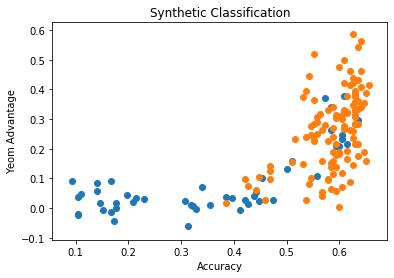

In [7]:
de = ds[ds['epsilon'] > 0]
dp = de[de['method'] == 'dp']
dp = dp[dp['throw out'] != False]
ls = de[de['method'] == 'is']
plt.scatter(dp['acc'], dp['yeom'])
plt.scatter(ls['acc'], ls['yeom'])
plt.xlabel('Accuracy')
plt.ylabel('Yeom Advantage')
plt.title('Synthetic Classification')


Text(0.5, 1.0, 'Synthetic Classification')

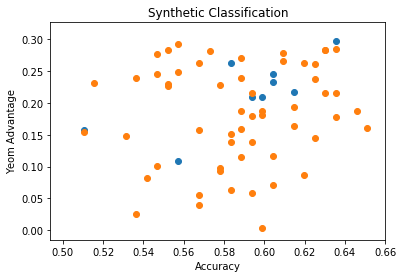

In [9]:
de = ds[(ds['epsilon'] > 0) & (ds['acc'] > .5) & ( ds['yeom'] < .3)]
dp = de[de['method'] == 'dp']
dp = dp[dp['throw out'] != False]
ls = de[de['method'] == 'is']
plt.scatter(dp['acc'], dp['yeom'])
plt.scatter(ls['acc'], ls['yeom'])
plt.xlabel('Accuracy')
plt.ylabel('Yeom Advantage')
plt.title('Synthetic Classification')

In [5]:
ls[(ls['acc'] > .6) & (ls['yeom'] < .1)]

,acc,yeom,merlin,method,epsilon,throw out,batch_size
124,0.619792,0.087240,0.451563,is,1000,0.07,64
152,0.604167,0.071615,0.449219,is,1,1.5,64


In [7]:
ls[ls['yeom'] < .3].sort_values(['acc'], ascending=False)

,acc,yeom,merlin,method,epsilon,throw out,batch_size
131,0.651042,0.160156,0.450781,is,50000,1.5,64
138,0.645833,0.187500,0.450781,is,10,0.5,64
172,0.635417,0.177083,0.471094,is,1000,1.5,64
108,0.635417,0.285156,0.450781,is,10000,2,64
143,0.635417,0.214844,0.450000,is,100,1,64
...,...,...,...,...,...,...,...
157,0.447917,0.104167,0.450000,is,1,5,64
66,0.442708,0.061198,0.480469,is,10000,0.03,64
35,0.427083,0.072917,0.450000,is,1,0.03,64
126,0.421875,0.097656,0.000000,is,5,0.5,64


Text(0.5, 1.0, 'synthetic classification')

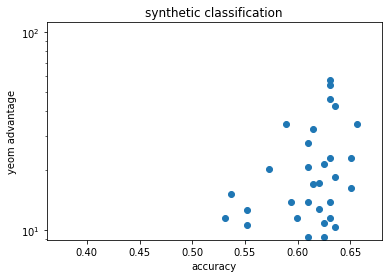

In [22]:

plt.scatter(ls['acc'], (ls['throw out'] * np.log(ls['epsilon'])))
plt.xlabel('accuracy')
plt.yscale('log')
plt.ylabel('yeom advantage')
plt.title('synthetic classification')

In [21]:
(ls['throw out'] * np.log(ls['epsilon']))

2        6.90776
5       0.138155
6              0
7       0.644724
8              0
         ...    
175      13.8155
177    0.0482831
178     0.596204
179      20.2533
182     0.324593
Length: 113, dtype: object